In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

In [3]:
from config import DB_USER, DB_PASSWORD, DB_SERVER_NAME, DB_DATABASE_NAME
connection_url = URL.create(
    drivername = "postgresql+pg8000", 
    username = DB_USER,
    password = DB_PASSWORD,
    host = DB_SERVER_NAME, 
    port = 5432,
    database = DB_DATABASE_NAME, 
)

engine = create_engine(connection_url)

In [18]:
BTC_df = pd.read_sql("btc", engine)



In [19]:
BTC_df.tail[50]

TypeError: 'method' object is not subscriptable

In [8]:
X = BTC_df["Date"].values.reshape(-1, 1)
y = BTC_df["Adj Close"].values.reshape(-1, 1)


print("Shape: ", X.shape, y.shape)

Shape:  (2715, 1) (2715, 1)


Text(0, 0.5, 'Adj Close')

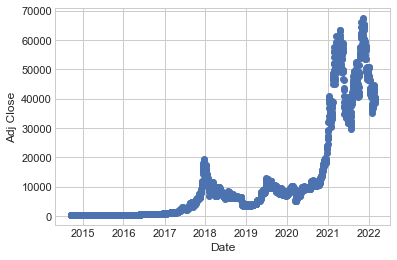

In [9]:
plt.scatter(X, y)
plt.xlabel("Date")
plt.ylabel("Adj Close")

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
# train the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
model.score(X_test_scaled, y_test_scaled)

0.5740850742793165

In [29]:
# save model 
import joblib 
joblib.dump(model, "../app/static/py/model.sav")
joblib.dump(y_scaler, "../app/static/py/y_scaler.sav")
joblib.dump(X_scaler, "../app/static/py/x_scaler.sav")


['../app/static/py/x_scaler.sav']

In [33]:
model.score(X_train_scaled, y_train_scaled)
    

0.5791865181459266